# Cтатистические критерии и проверка гипотез

In [1]:
import numpy as np
from scipy import stats as ss

import pickle

import matplotlib.pyplot as plt
%matplotlib inline

## Задание 1

Так какая кофейня лучше, согласно данным Алексея? Примените $z$-критерий для ответа на этот вопрос. Напишите ниже какую гипотезу против какой альтернативы вы проверяете, напишите процедуру проверки критерия по данным и сделайте вывод.

In [2]:
with open("./data/seminar_04_coffee.pkl","rb") as f:#Путь к вашему файлу 
    vals=pickle.load(f)
    coffeePoint = vals["coffeePoint"]
    pointCoffee = vals["pointCoffee"]

In [3]:
coffeePoint

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1], dtype=int32)

In [4]:
pointCoffee

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int32)

In [5]:
coffeePoint.mean()

np.float64(0.28)

In [6]:
pointCoffee.mean()

np.float64(0.47)

In [7]:
#ваше решение

# 1 -- coffeePoint
# 2 -- pointCoffee

# H_0: p_1 = p_2
# H_A: p_1 < p_2

def checkCoffee(data,alpha):
    
    n = len(data["coffeePoint"])
    m = len(data["pointCoffee"])

    hat_p_1 = np.mean(data["coffeePoint"])
    hat_p_2 = np.mean(data["pointCoffee"])

    sigma_sq_1 = (hat_p_1 * (1 - hat_p_1)) 
    sigma_sq_2 = (hat_p_2 * (1 - hat_p_2))

    sigma = np.sqrt(sigma_sq_1/n + sigma_sq_2/m)

    statistic = (hat_p_1 - hat_p_2) / sigma

    # Односторонняя альтернатива справа
    z = ss.norm.ppf(alpha)

    interval = ('-inf', (hat_p_1 - hat_p_2) + z * sigma)

    pval = ss.norm.cdf(statistic)
    print(f"Statistic: {statistic}")
    print(f"P-value: {pval}")
    print(f'Interval: {interval[0]}, {interval[1]}')


In [8]:
checkCoffee(vals, 0.05)

Statistic: -2.8301523972260383
P-value: 0.002326291841384217
Interval: -inf, -0.30042592244399874


ВАШИ ВЫВОДЫ ЗДЕСЬ

## Задание 2

Галилео Галилей (ГГ, имя изменено) записал наблюдения для двух серий испытаний, в ходе которых он сбрасывал два разных по массе, н оодинаковых по форме шара. Времена падения в первом случае составили $X_1,..,X_n$, а во втором $Y_1,..,Y_n$. ГГ предполагает, что время падения на самом деле фиксировано для первого и второго шара, но вот вопрос, равны ли они?

Здесь нам снова поможет $z$-критерий, получающийся с помощью ЦПТ. Но интересно, что если бы мы имели основания предполагать гауссовость наблюдений (для проверки этого тоже есть свои критерии), то критерий получился бы другой.

Центральная предельная теорема говорит, что при больших $n$ приближённо
$$
\frac{\sqrt{n}\left( \overline{X} - \overline{Y} - \mathbb{E}[X-Y]\right)}{\sigma(X-Y)} \sim \mathcal{N}(0,1).
$$
Проблема в том, что $\sigma$ нам неизвестна, но мы можем использовать ЦПТ и в случае, если мы поменяем её на выборочный аналог
$$
\hat{\sigma} = \sqrt{\hat{\sigma}(X)^2 + \hat{\sigma}(Y)},
$$
где $\hat{\sigma}(X)^2, \hat{\sigma}(Y)^2$ -- это выборочные дисперсии.

Постройте $z$-критерий для проверки гипотезы
$$
H_0: \mathbb{E}[X]=\mathbb{E}[Y]
$$
против альтернативы
$$
H_A: \mathbb{E}[X] \neq \mathbb{E}[Y].
$$
Используйте этот критерий для ответа на вопрос: является ли время падения одинаковым для первого и второго шара?


In [9]:
with open("./data/seminar_04_galileo.pkl", "rb") as f:#данные из ДЗ
    vals = pickle.load(f)
    ball1Times = vals["ball1Times"]
    ball2Times = vals["ball2Times"]

In [17]:
def checkTime(X, Y, alpha):
    
    # Здесь написан более общий случай для выборок разного размера
    n_x = len(X)
    n_y = len(Y)

    X_bar = np.mean(X)
    Y_bar = np.mean(Y)

    sigma_sq_X = np.std(X) ** 2
    sigma_sq_Y = np.std(Y) ** 2

    sigma = np.sqrt(sigma_sq_X / n_x + sigma_sq_Y / n_y)

    statistic = (X_bar - Y_bar) / sigma

    # Двусторонняя альтернатива
    z = ss.norm.ppf(1-alpha/2)


    interval = ((X_bar - Y_bar) - z * sigma, (X_bar - Y_bar) + z * sigma)

    cdf = ss.norm.cdf(statistic)

    if cdf > 0.5:
        pval = 2 * (1 - cdf)

    else:
        pval = 2*cdf

    print(f"Statistic: {statistic}")
    print(f"P-value: {pval}")
    print(f'Interval: {interval[0]}, {interval[1]}')

In [18]:
checkTime(ball1Times, ball2Times, 0.05)

Statistic: -0.8612150980439748
P-value: 0.3891195861290243
Interval: -0.057175535854011326, 0.02226783714023247


## Задание 3

ГГ где-то слышал, что в экспериментах ошибки обычно имеют почти гауссовское распределение, но ему не очень в это верится. Мы можем проверить выборку на соответствие заданному закону распределения с использованием критерия Колмогорова. Конкретнее, мы будем проверять
$$
H_0: X_1,..,X_n \sim \mathcal{N}(\overline{X}, \hat{\sigma}(X))
$$
против альтернативы
$$
H_A: X_1,..,X_n \nsim \mathcal{N}(\overline{X}, \hat{\sigma}(X))
$$
с использование статистики
$$
D = \sqrt{n} \sup_x \vert F_{\mathcal{N}} - \hat{F}(x)\vert,
$$
где $F_{\mathcal{N}}$ -- это функция распределения $\mathcal{N}(\overline{X}, \hat{\sigma}(X))$, а $\hat{F}$ -- эмпирическая функция распределения, которая задётся как
$$
\hat{F}(x) = \frac{1}{n}\sum_{i=1}^n \mathbb{1}(X_i \leq x).
$$
Выражение $1(условие)$ равно $1$, если условие верно и $0$ в противном случае -- так выше считается количество элементов выборки $\leq x$.

Статистика $D$ при больших $n$ (сотен уже достаточно) имеет распределение Колмогорова, так что можно построитть критерий для проверки. Чтобы упростить техническую часть с подсчётом $D$, мы воспользуемся готовым тестом из пакета scipy.stats.

In [107]:
with open("./data/seminar_04_galileo.pkl", "rb") as f:#данные из ДЗ
    vals = pickle.load(f)
    ball1Times = vals["ball1Times"]
    ball2Times = vals["ball2Times"]

Нарисуйте две гистограммы для ball1Times и ball2Times.

(array([ 1.,  0.,  0.,  1.,  1.,  2.,  6.,  1.,  7.,  5.,  5.,  6., 11.,
         7.,  6., 14., 15., 25., 19., 14., 11.,  7., 10.,  7.,  7.,  4.,
         2.,  3.,  3.,  2.]),
 array([2.71305747, 2.7548961 , 2.79673472, 2.83857334, 2.88041197,
        2.92225059, 2.96408922, 3.00592784, 3.04776646, 3.08960509,
        3.13144371, 3.17328233, 3.21512096, 3.25695958, 3.2987982 ,
        3.34063683, 3.38247545, 3.42431408, 3.4661527 , 3.50799132,
        3.54982995, 3.59166857, 3.63350719, 3.67534582, 3.71718444,
        3.75902306, 3.80086169, 3.84270031, 3.88453893, 3.92637756,
        3.96821618]),
 <BarContainer object of 30 artists>)

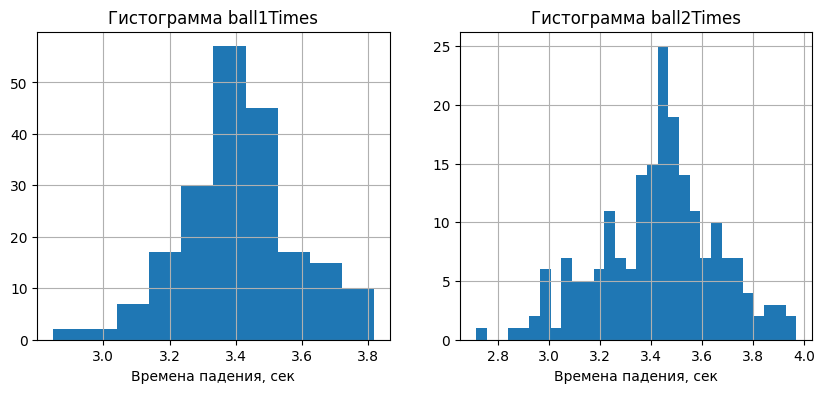

In [109]:
f, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))

ax1.grid()
ax1.set_title("Гистограмма ball1Times")
ax1.set_xlabel("Времена падения, сек")
#нарисуте гистограмму, используя ax1.hist
ax1.hist(ball1Times)

ax2.grid()
ax2.set_title("Гистограмма ball2Times")
ax2.set_xlabel("Времена падения, сек")
#нарисуте гистограмму, используя ax2.hist
ax2.hist(ball2Times, bins=30)

Вроде похоже на нормальное, но на глаз сложно. Нарисуйте две функции распределения: соответствующую гипотезе ($F_{\mathcal{N}(0,1)}$) и эмпирическую функцию распределения $\hat{F}$ для выборок $X,Y$.

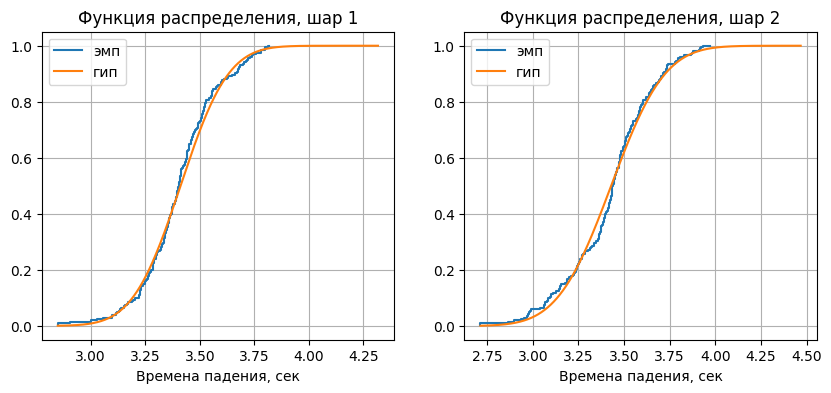

In [110]:
#ПОДСКАЗКА функция распределения N(0,1) -- это функция spstats.norm.cdf
#           но будьте внимательны, так как у данных другие матожидание и дисперсия, 
#           при рисовании нужно писать spstats.norm.cdf(  (xs - среднее)/стдОтклонение ) 

#ПОДСКАЗКА эмпирическая функция распределения растёт ступеньками, прибавляя 1/n на каждой;
#          начало каждой ступеньки -- это новая точка выборки;
#          если выборка отсортирована по возрастанию, то можно написать plot(xs, (1+np.arange(n))/n);
#          для сортировки попробуйте np.sort

#ПОДСКАЗКА чтобы matplotlib рисовал именно ступеньки, а не ломаную, используйте ax.step вместо ax.plot

#сетка аргументов для рисования cdf
x1s = np.arange(np.min(ball1Times),np.max(ball1Times)+0.5, step=(np.max(ball1Times) - np.min(ball1Times))/1000 )
x2s = np.arange(np.min(ball2Times),np.max(ball2Times)+0.5, step=(np.max(ball2Times) - np.min(ball2Times))/1000 )


f, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))

ax1.grid()
ax1.set_title("Функция распределения, шар 1")
ax1.set_xlabel("Времена падения, сек")
ax1.step(np.sort(ball1Times), (1+np.arange(len(ball1Times)))/len(ball1Times))
ax1.plot(x1s,ss.norm.cdf( (x1s - np.mean(ball1Times))/np.std(ball1Times)) )
ax1.legend(["эмп","гип"])

ax2.grid()
ax2.set_title("Функция распределения, шар 2")
ax2.set_xlabel("Времена падения, сек")
ax2.step(np.sort(ball2Times), (1+np.arange(len(ball2Times)))/len(ball2Times))
ax2.plot(x2s,ss.norm.cdf( (x2s - np.mean(ball2Times))/np.std(ball2Times)) ) 
ax2.legend(["эмп","гип"])

Вроде похоже на нормальное, но нам нужно проверить критерий Колмогорова.

In [111]:
#spstats.kstest(data,cdf) проверяет критерий Колмогорова на соответствие данных функции распределения cdf

#ПОДСКАЗКА вам вернётся статистика и p-value (см. подробнее справку)
#ПОДСКАЗКА помните, что spstats.norm.cdf -- это функция распределения N(0,1), 
#                    то есть, данные data нужно центрировать и нормировать стандратным отклонением

print(ss.kstest( (ball1Times-np.mean(ball1Times))/np.std(ball1Times), ss.norm.cdf ))
print(ss.kstest( (ball2Times-np.mean(ball2Times))/np.std(ball2Times), ss.norm.cdf ))

KstestResult(statistic=np.float64(0.05145783403573323), pvalue=np.float64(0.6394430168040082), statistic_location=np.float64(0.23296709755069558), statistic_sign=np.int8(1))
KstestResult(statistic=np.float64(0.08220091417513115), pvalue=np.float64(0.12333067024220112), statistic_location=np.float64(-0.30750208758668895), statistic_sign=np.int8(-1))


In [116]:
# TODO Добавить гипотезу о равенстве дисперсий

## Задание 4

Оказывается, что в случае, если распределение двух выборок $X_1,..,X_n$ и $Y_1,..,Y_n$ гауссовское, то можно предложить другой точный(не асимптотический) критерий, называемый критерием Стьюдента.

Распределение Стьюдента c $n-1$ степенью свободы задаётся на основе выборки $X_1,..,X_n \sim \mathcal{N}(\mu,\sigma^2)$ как распределение
$$
\frac{\sqrt{n}\left( \overline{X} -\mathbb{E}[X] \right)}{\hat{\sigma}} \sim t(n-1).
$$

Поэтому при неизвестной, но (предполагаемой) одинаковой дисперсии двух гауссовских выборок $X_1,..,X_m \sim \mathcal{N}(\mu_1, \sigma^2)$ и $Y_1,..,Y_n \sim \mathcal{N}(\mu_2, \sigma^2)$ можно построить критерий для проверки гипотезы
$$
H_0: \mu_1 =\mu_2
$$
против альтернативы 
$$
H_A: \mu_1 \neq \mu_2
$$
используя статистику
$$
T = \frac{\overline{X} -\overline{Y} }{\hat{\sigma}} \sqrt{\frac{mn}{m+n}},
$$
которая при верной гипотезе имеет распределение Стьюдента $t(m+n-2)$ и 
$$
\hat{\sigma} = \sqrt{\frac{(n-1)\hat{\sigma}(X)^2 + (m-1)\hat{\sigma}(Y)^2}{(n+m-2)}},
$$
как и выше. Критерии со статистикой, имеющей распределение Стьюдента называют обычно критериями Стьюдента или $t$-критериями (по обозначению распределения).

Реализуйте данный критерий, и, предполагая гауссовость наблюдений ГГ, ответьте на вопрос Задания 2 с использованием критерия Стьюдента.

Примечание: при большой выборке (и, соответственно, большом количестве степеней свободы), распределение Стьюдента сходится к нормальному -- ЦПТ всё ещё работает.

In [117]:
with open("./data/seminar_04_galileo.pkl", "rb") as f:
    vals = pickle.load(f)
    ball1Times = vals["ball1Times"]
    ball2Times = vals["ball2Times"]

In [118]:
np.std(ball1Times)

np.float64(0.17190660749412287)

In [119]:
np.std(ball2Times)

np.float64(0.23111924188817243)

In [120]:
def checkTimeT(X,Y,alpha):

    n = len(X)
    m = len(Y)

    X_bar = np.mean(X)
    Y_bar = np.mean(Y)

    sigma_sq_X = np.std(X) ** 2
    sigma_sq_Y = np.std(Y) ** 2

    sigma = np.sqrt(
        (n-1) * sigma_sq_X + (m-1) * sigma_sq_Y
        / (n + m - 2)
        )

    multiplier = np.sqrt(m*n / (m+n))


    statistic = (X_bar - Y_bar) / sigma * multiplier

    # Двусторонняя альтернатива
    z = ss.t.ppf((1-alpha/2), df=n+m-2)



    interval = ((X_bar - Y_bar) - z * sigma * (1/multiplier), (X_bar - Y_bar) + z * sigma * (1/multiplier))

    cdf = ss.norm.cdf(statistic)

    if cdf > 0.5:
        pval = 2 * (1 - cdf)
    else:
        pval = 2*cdf

    print(f"Statistic: {statistic}")
    print(f"P-value: {pval}")
    print(f'Interval: {interval[0]}, {interval[1]}')


In [121]:
checkTimeT(ball1Times, ball2Times, 0.05)

Statistic: -0.0718103640022512
P-value: 0.9427528248353498
Interval: -0.4952709486998884, 0.46036324998610956


## Задание 5

Алексея настолько заинтересовали свои результаты, что он решил попробовать утвердить их ещё больше. Считая, что предыдущий эксперимент не вполне качественный, так как в какой-то момент кофе ему мог просто надоесть от того, что он берёт много дней подряд одно и то же, Алексей в рабочем чате он запустил предложение: пусть каждый из коллег в офисе сходит в одну кофейню, в другую, и оценит качество кофе. Понятно, что многие тоже покупают там кофе, но Алексей надеется что этот "эффект одной и той же чашки кофе" сгладится, если людей будет достаточно много.

В итоге отозвалось аж 78 человек. Чтобы избавиться от ЦПТ, Алексей решил использовать ранговые критерии, чтобы получить точный тест. Результаты употребления кофе ранжировались от $0$ до $5$, собрали две выборки $X_1,..,X_{73}$ и $Y_1,..,Y_{73}$.

Помогите Алексею проверить с помощью критерия Манна-Уитни, кто лучше: кофеТочка или точкаКофе?

In [75]:
with open("./data/seminar_04_office.pkl","rb") as f:
    vals = pickle.load(f)
    coffeePoint = vals["coffeePoint"]
    pointCoffee = vals["pointCoffee"]

(array([ 5.,  0., 27.,  0.,  0., 27.,  0., 12.,  0.,  7.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

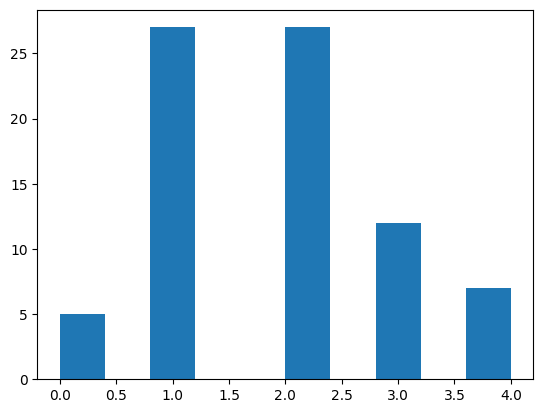

In [81]:
plt.hist(coffeePoint)

(array([ 1.,  0.,  4.,  0., 22.,  0., 25.,  0., 21.,  5.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

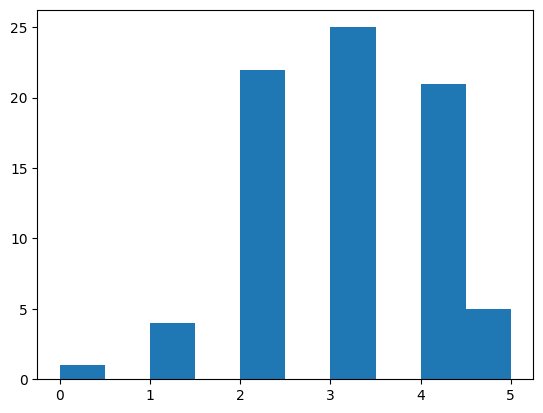

In [82]:
plt.hist(pointCoffee)

Напишите здесь, какую гипотеза и против какой альтернативы вы хотите проверить?

In [85]:
#проверьте вашу гипотезу с помощью критерия Манна-Уитни на уровне значимости 0.05

print(ss.mannwhitneyu(coffeePoint, pointCoffee, alternative="two-sided"))

MannwhitneyuResult(statistic=np.float64(1427.0), pvalue=np.float64(3.722914015046292e-09))
